In [26]:
import requests
import lxml.html as lh
import pandas as pd
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt # required for data visualization purposes.
from BeautifulSoup import BeautifulSoup, SoupStrainer
from bs4 import BeautifulSoup

In [27]:
starting_url = 'https://archive.ics.uci.edu/ml/'
url='https://archive.ics.uci.edu/ml/datasets.html'
page = requests.get(url)
soup = BeautifulSoup(page.content, 'html.parser')
#print soup.prettify()

In [28]:
def scrape_url(url, index):
    response = requests.get(url)
    if (response.content == None):
        return [],[None] * 9
    soup = BeautifulSoup(response.content, "html.parser")
    header = soup.find("b", text="Number of Instances:")
    if (header == None):
        return [],[None] * 9
    table = header.find_parent("table")
    dictionary_to_df= {}
    first = 0 
    data = []
    data.append(index)
    columns = []
    columns.append('DataSet Name')
    for row in table.find_all("tr"):
        L= row.find_all("td")
        for cell in L[1::2]:
            data.append(cell.get_text(strip=True))
        for cell in L[0::2] :
            columns.append(cell.get_text(strip=True))
    return columns, data
    

In [29]:
columns, data = scrape_url('https://archive.ics.uci.edu/ml/datasets/Abalone', 'Abalone')
print columns
print data

['DataSet Name', u'Data Set Characteristics:', u'Number of Instances:', u'Area:', u'Attribute Characteristics:', u'Number of Attributes:', u'Date Donated', u'Associated Tasks:', u'Missing Values?', u'Number of Web Hits:']
['Abalone', u'Multivariate', u'4177', u'Life', u'Categorical, Integer, Real', u'8', u'1995-12-01', u'Classification', u'No', u'677113']


In [32]:
start_now = 0
list_of_data = []
for link in soup.findAll('a'):
    #print link.get_text(strip=True)
    dataset_name = link.get_text(strip=True)
    if link.has_attr('href'):
        #print '======= has link  ======='
        if link.get_text(strip=True) == 'Abalone':
            columns, data = scrape_url(starting_url+link['href'], 'Abalone' ) 
            start_now = 1
        if start_now == 0 or link.get_text(strip=True) == '':            
            continue
        #print link.get_text(strip=True), link['href']
        #print '==============================================================='
        cols, data = scrape_url(starting_url+link['href'],dataset_name)
        #print columns,data
        if None in data:
            print dataset_name
        list_of_data.append(data)
        #print '==============================================================='

Mesotheliomaâ€™s disease data set
Improved Spiral Test Using Digitized Graphics Tablet for Monitoring Parkinsonâ€™s Disease
Early biomarkers of Parkinson’s disease based on natural connected speech
chestnut â€“ LARVIC
Online Shoppersâ€™ Purchasing Intention Dataset
About
Citation Policy
Donation Policy
Contact
CML


In [33]:
data = pd.DataFrame(list_of_data, columns=columns)
data.head(10)

,DataSet Name,Data Set Characteristics:,Number of Instances:,Area:,Attribute Characteristics:,Number of Attributes:,Date Donated,Associated Tasks:,Missing Values?,Number of Web Hits:
0,Abalone,Multivariate,4177,Life,"Categorical, Integer, Real",8,1995-12-01,Classification,No,677119
1,Adult,Multivariate,48842,Social,"Categorical, Integer",14,1996-05-01,Classification,Yes,1293409
2,Annealing,Multivariate,798,Physical,"Categorical, Integer, Real",38,N/A,Classification,Yes,125887
3,Anonymous Microsoft Web Data,N/A,37711,Computer,Categorical,294,1998-11-01,Recommender-Systems,N/A,143217
4,Arrhythmia,Multivariate,452,Life,"Categorical, Integer, Real",279,1998-01-01,Classification,Yes,228320
5,Artificial Characters,Multivariate,6000,Computer,"Categorical, Integer, Real",7,1992-07-01,Classification,No,192079
6,Audiology (Original),Multivariate,226,Life,Categorical,N/A,1987-12-03,Classification,Yes,86227
7,Audiology (Standardized),Multivariate,226,Life,Categorical,69,1992-08-18,Classification,Yes,84240
8,Auto MPG,Multivariate,398,N/A,"Categorical, Real",8,1993-07-07,Regression,Yes,367389
9,Automobile,Multivariate,205,N/A,"Categorical, Integer, Real",26,1987-05-19,Regression,Yes,332507


In [104]:
print data.info()
display(HTML(data.describe().to_html()))
print '\n'
print 'Number of NULL'
print '\n'
print data.isnull().sum()
print '\n\n'
print 'Number of UNIQUE'
print '\n'
print data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 10 columns):
DataSet Name                  447 non-null object
Data Set Characteristics:     447 non-null object
Number of Instances:          447 non-null object
Area:                         447 non-null object
Attribute Characteristics:    447 non-null object
Number of Attributes:         447 non-null object
Date Donated                  447 non-null object
Associated Tasks:             447 non-null object
Missing Values?               447 non-null object
Number of Web Hits:           447 non-null object
dtypes: object(10)
memory usage: 35.8+ KB
None


,DataSet Name,Data Set Characteristics:,Number of Instances:,Area:,Attribute Characteristics:,Number of Attributes:,Date Donated,Associated Tasks:,Missing Values?,Number of Web Hits:
count,447,447,447,447,447,447,447,447,447,447
unique,447,39,362,9,9,146,354,20,3,447
top,UJIIndoorLoc,Multivariate,N/A,Computer,Real,N/A,N/A,Classification,N/A,53969
freq,1,239,33,161,157,59,30,241,273,1




Number of NULL


DataSet Name                  10
Data Set Characteristics:     10
Number of Instances:          10
Area:                         10
Attribute Characteristics:    10
Number of Attributes:         10
Date Donated                  10
Associated Tasks:             10
Missing Values?               10
Number of Web Hits:           10
dtype: int64



Number of UNIQUE


DataSet Name                  447
Data Set Characteristics:      39
Number of Instances:          362
Area:                           9
Attribute Characteristics:      9
Number of Attributes:         146
Date Donated                  354
Associated Tasks:              20
Missing Values?                 3
Number of Web Hits:           447
dtype: int64


In [34]:
data = data.replace('N/A', np.nan)
data['Date Donated'] = pd.to_datetime(data['Date Donated'])
for i in data.columns:
    if i in ['DataSet Name','Data Set Characteristics:','Area:','Attribute Characteristics:','Associated Tasks:','Missing Values?']:  
        data[i] = data[i].str.strip().astype('category')
    else:
        if(i== 'Date Donated'):
            continue
        data[i] = data[i].astype(float)

In [36]:
data.head(10)

,DataSet Name,Data Set Characteristics:,Number of Instances:,Area:,Attribute Characteristics:,Number of Attributes:,Date Donated,Associated Tasks:,Missing Values?,Number of Web Hits:
0,Abalone,Multivariate,4177.0,Life,"Categorical, Integer, Real",8.0,1995-12-01,Classification,No,677119.0
1,Adult,Multivariate,48842.0,Social,"Categorical, Integer",14.0,1996-05-01,Classification,Yes,1293409.0
2,Annealing,Multivariate,798.0,Physical,"Categorical, Integer, Real",38.0,NaT,Classification,Yes,125887.0
3,Anonymous Microsoft Web Data,NaN,37711.0,Computer,Categorical,294.0,1998-11-01,Recommender-Systems,NaN,143217.0
4,Arrhythmia,Multivariate,452.0,Life,"Categorical, Integer, Real",279.0,1998-01-01,Classification,Yes,228320.0
5,Artificial Characters,Multivariate,6000.0,Computer,"Categorical, Integer, Real",7.0,1992-07-01,Classification,No,192079.0
6,Audiology (Original),Multivariate,226.0,Life,Categorical,NaN,1987-12-03,Classification,Yes,86227.0
7,Audiology (Standardized),Multivariate,226.0,Life,Categorical,69.0,1992-08-18,Classification,Yes,84240.0
8,Auto MPG,Multivariate,398.0,NaN,"Categorical, Real",8.0,1993-07-07,Regression,Yes,367389.0
9,Automobile,Multivariate,205.0,NaN,"Categorical, Integer, Real",26.0,1987-05-19,Regression,Yes,332507.0


In [37]:
print data.info()
display(HTML(data.describe().to_html()))
print '\n'
print 'Number of NULL'
print '\n'
print data.isnull().sum()
print '\n\n'
print 'Number of UNIQUE'
print '\n'
print data.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 10 columns):
DataSet Name                  447 non-null category
Data Set Characteristics:     429 non-null category
Number of Instances:          414 non-null float64
Area:                         375 non-null category
Attribute Characteristics:    381 non-null category
Number of Attributes:         388 non-null float64
Date Donated                  417 non-null datetime64[ns]
Associated Tasks:             401 non-null category
Missing Values?               174 non-null category
Number of Web Hits:           447 non-null float64
dtypes: category(6), datetime64[ns](1), float64(3)
memory usage: 44.1 KB
None


,Number of Instances:,Number of Attributes:,Number of Web Hits:
count,4.140000e+02,3.880000e+02,4.470000e+02
mean,5.612742e+05,2.547686e+04,1.027047e+05
std,4.053110e+06,2.272805e+05,1.676611e+05
min,1.000000e+01,1.000000e+00,5.110000e+02
25%,3.392500e+02,9.000000e+00,3.356850e+04
50%,1.975000e+03,2.100000e+01,5.949200e+04
75%,1.955625e+04,7.200000e+01,1.085030e+05
max,6.300000e+07,3.231961e+06,2.181826e+06




Number of NULL


DataSet Name                   10
Data Set Characteristics:      28
Number of Instances:           43
Area:                          82
Attribute Characteristics:     76
Number of Attributes:          69
Date Donated                   40
Associated Tasks:              56
Missing Values?               283
Number of Web Hits:            10
dtype: int64



Number of UNIQUE


DataSet Name                  447
Data Set Characteristics:      38
Number of Instances:          361
Area:                           8
Attribute Characteristics:      8
Number of Attributes:         145
Date Donated                  353
Associated Tasks:              19
Missing Values?                 2
Number of Web Hits:           446
dtype: int64


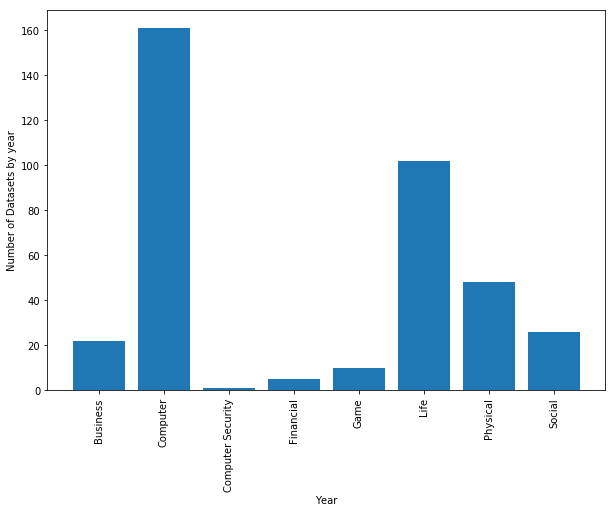

In [97]:
region =data['Area:'].value_counts().sort_index()
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets by year')
plt.xlabel('Year')
plt.show()

No      74
Yes    100
Name: Missing Values?, dtype: int64


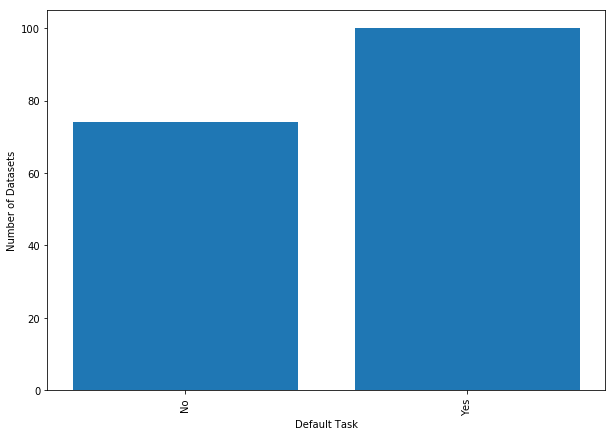

In [98]:
region =data['Missing Values?'].value_counts().sort_index()
print region
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets')
plt.xlabel('Default Task')
plt.show()

Categorical                    38
Categorical, Integer           28
Categorical, Integer, Real     20
Categorical, Real               6
Categorical, Real, Integer      1
Integer                        73
Integer, Real                  60
Real                          159
Name: Attribute Types, dtype: int64


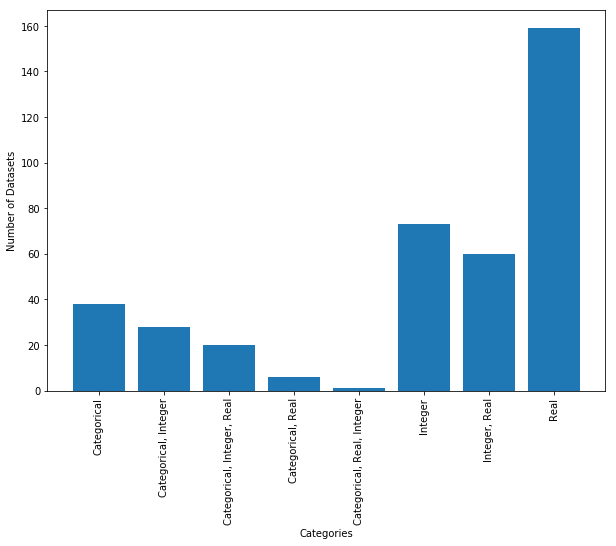

In [204]:
region =data['Attribute Types'].value_counts().sort_index()
print region
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets')
plt.xlabel('Categories')
plt.show()

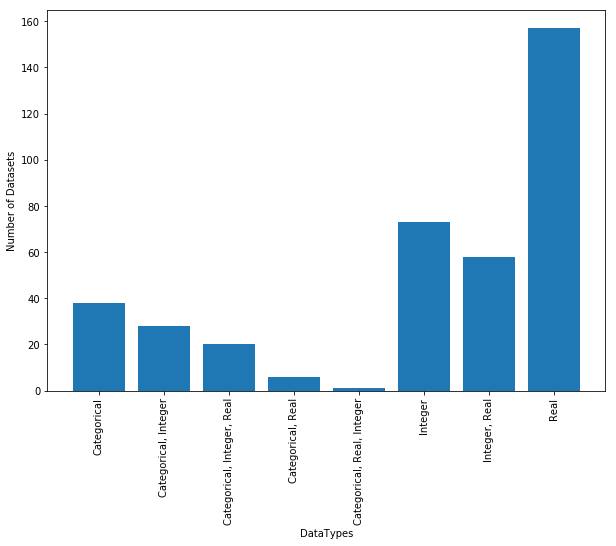

In [101]:
region =data['Attribute Characteristics:'].value_counts().sort_index()
plt.figure(figsize=(10,7))
plt.bar(np.arange(len(region.index)),region.values)
plt.xticks(np.arange(len(region.index)), region.index)
plt.xticks(rotation=90)
plt.ylabel('Number of Datasets')
plt.xlabel('DataTypes')
plt.show()